In [7]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")  # Path to the compressed dataset

    if not tarball_path.is_file():  # If the file doesn't exist locally
        Path("datasets").mkdir(parents=True, exist_ok=True)  # Create the 'datasets' directory if needed

        url = "https://github.com/ageron/data/raw/main/housing.tgz"  # URL to download the dataset
        urllib.request.urlretrieve(url, tarball_path)  # Download the .tgz file from the URL and save it locally

        with tarfile.open(tarball_path) as housing_tarball:  # Open the .tgz file as a tar archive
            housing_tarball.extractall(path="datasets")  # Extract all contents into the 'datasets' directory

    return pd.read_csv(Path("datasets/housing/housing.csv"))  # Load the CSV data into a DataFrame and return it

housing = load_housing_data()

In [12]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5]
)


from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    housing,
    test_size=0.2,
    stratify=housing["income_cat"],
    random_state=42
)

housing = strat_train_set.copy()

### Set data use to Correlate

In [13]:
corr_matrix = housing.select_dtypes(include=['number']).corr()

### median_house_value Correlation

In [15]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687823
total_rooms           0.132726
housing_median_age    0.102761
households            0.068516
total_bedrooms        0.051699
population           -0.023537
longitude            -0.053639
latitude             -0.138313
Name: median_house_value, dtype: float64

### Visualizing Specific Correlations

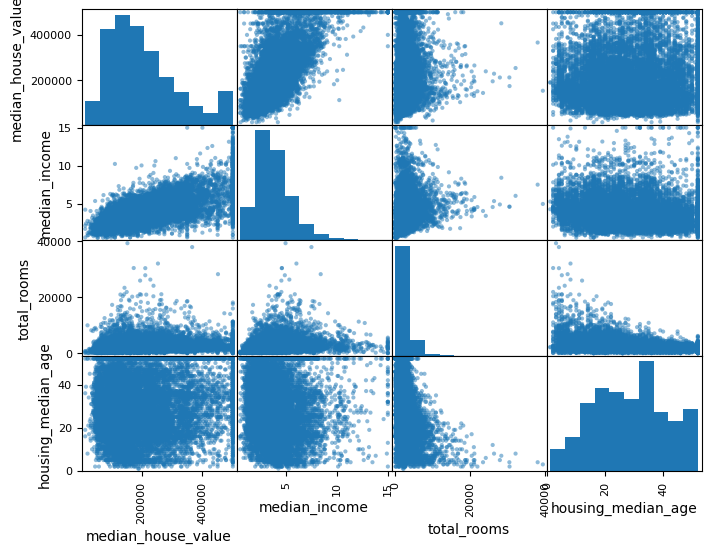

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(8, 6))
plt.show()

### Getting the most promising Correlation

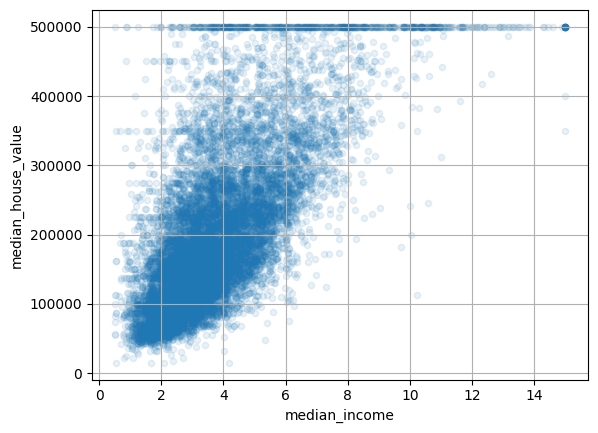

In [22]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()